C:\Users\ASUS\AppData\Local\Temp\ipykernel_6980\2239154832.py:43: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(integrand_vals, h_vals)


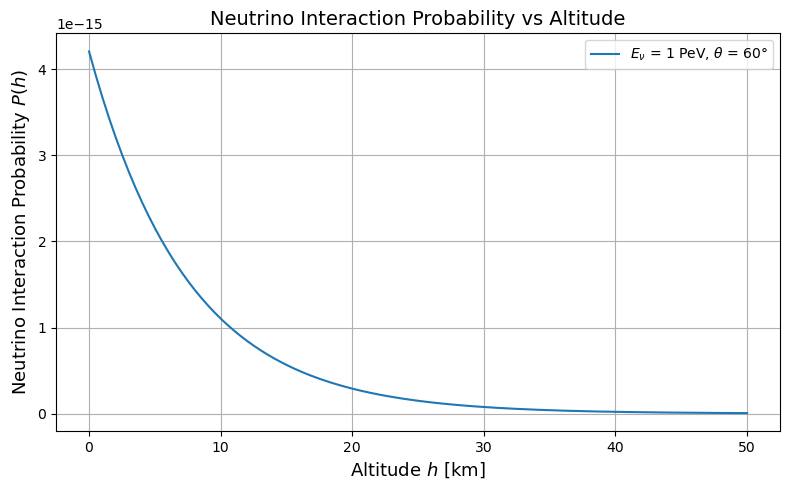

In [1]:
#中微子反应概率
# === 导入库 ===
import numpy as np
import matplotlib.pyplot as plt

# === 常数参数 ===
Re = 6371.0  # 地球半径 [km]
theta_deg = 60  # 天顶角 [度]
theta = np.radians(theta_deg)

# 中微子能量 [GeV]
E_nu = 1e6

# 截面 A(E_nu)
def A_nu(E_nu):
    return 1.148e-13 * (E_nu)**0.363  # [cm^2/g]

# 大气密度模型（简化）：指数型 [g/cm^3]
def rho(h):
    return 1.225 * np.exp(-h / 7.5) / 1000  # [g/cm^3] -> [g/cm^2/km]

# 几何路径长度 l(h, theta) [km]
def l_h(h, theta):
    sin2 = np.sin(theta)**2
    return (Re / sin2) * np.sqrt(np.cos(theta)**2 + (2 * h / Re) * sin2)

# 导数 dl/dh
def dl_dh(h, theta):
    return 1 / np.sqrt(np.cos(theta)**2 + (2 * h / Re) * np.sin(theta)**2)

# 中微子反应概率 P(h) 的积分核
def integrand(h, E_nu, theta):
    A = A_nu(E_nu)
    dens = rho(h)
    l_val = l_h(h, theta)
    dldh = dl_dh(h, theta)
    return A * dens * np.exp(-A * dens * l_val) * dldh

# 数值积分函数（Trapezoidal rule）
def compute_P(h_lower, h_upper, E_nu, theta, steps=1000):
    h_vals = np.linspace(h_lower, h_upper, steps)
    integrand_vals = integrand(h_vals, E_nu, theta)
    return np.trapz(integrand_vals, h_vals)

# === 海拔高度范围 ===
h_range = np.linspace(0, 50, 200)  # km

# === 计算每个海拔的 P(h) ===
P_values = [compute_P(h, h+0.1, E_nu, theta) for h in h_range]

# === 绘图 ===
plt.figure(figsize=(8, 5))
plt.plot(h_range, P_values, label=f"$E_\\nu$ = {E_nu/1e6:.0f} PeV, $\\theta$ = {theta_deg}°")
plt.xlabel("Altitude $h$ [km]", fontsize=13)
plt.ylabel("Neutrino Interaction Probability $P(h)$", fontsize=13)
plt.title("Neutrino Interaction Probability vs Altitude", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
